<a href="https://colab.research.google.com/github/OlyaSto/Olyabmstu/blob/master/%D0%A2%D0%9C%D0%9E/%D0%A0%D0%9A1/RK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рубежный контроль №1

Столярова О.Д. РТ5-61Б
Вариант 16:
Задача 2
Датасет 8

## Технологии разведочного анализа и обработки данных


### Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?


Датасет: https://www.kaggle.com/datasets/mathan/fifa-2018-match-statistics

Predict FIFA 2018 Man of the Match - Прогноз Человека Матча ФИФА в 2018

Данные собраны из официального приложения Чемпионата мира по футболу 2018 года в России. 

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Монтирование Google Drive для получения доступа к данным, лежащим на нем:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных:

In [3]:
filename = '/content/drive/MyDrive/FIFA.csv'

In [4]:
df = pd.read_csv(filename, sep=',')

### Общая информация о данных

Размер датасета:

In [5]:
df.shape

(128, 27)

Колонки датасета:

In [6]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

Типы данных колонок:

In [7]:
df.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

Первые 5 строк датасета:

In [8]:
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


Проверка пропущенных значений:

In [9]:
df.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

### Построим для пары произвольных колонок данных график "Jointplot"

Комбинация гистограмм и диаграмм рассеивания:

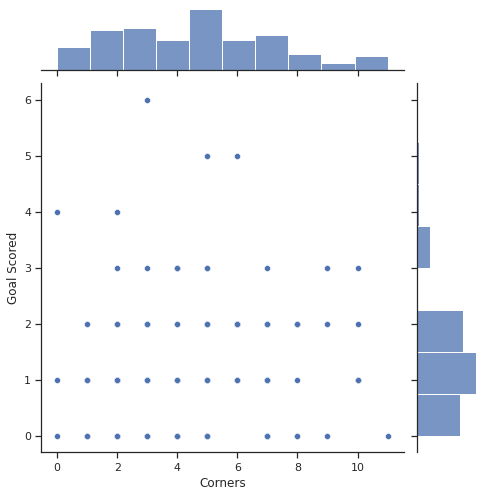

In [29]:
sns.jointplot(x='Corners', y='Goal Scored', data=df, height = 7)

### Обработка пропусков

С помощью цикла по колонкам датасета выберем колонки с пропущенными значениями:

In [11]:
num_cols = []
total_count = df.shape[0]
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка 1st Goal. Тип данных float64. Количество пустых значений 34, 26.56%.
Колонка Own goals. Тип данных float64. Количество пустых значений 116, 90.62%.
Колонка Own goal Time. Тип данных float64. Количество пустых значений 116, 90.62%.


Выведем только колонки с пропущенными значениями:

In [12]:
df_num = df[num_cols]
df_num

,1st Goal,Own goals,Own goal Time
0,12.0,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,89.0,NaN,NaN
4,NaN,1.0,90.0
...,...,...,...
123,5.0,NaN,NaN
124,4.0,NaN,NaN
125,NaN,NaN,NaN
126,18.0,1.0,18.0


Пропусков в категориальных колонках нет.

Гистограммы по признакам:

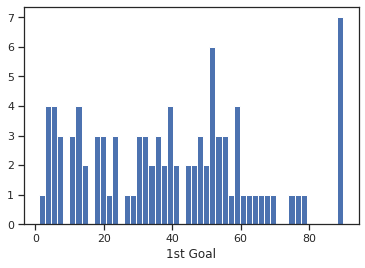

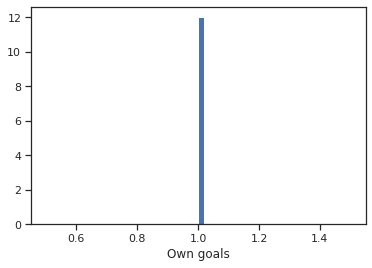

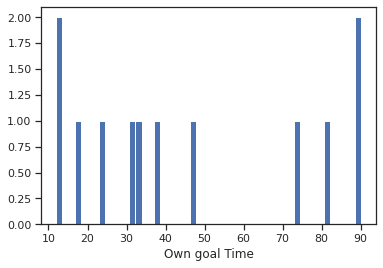

In [13]:
for col in df_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

 Для заполнения пропусков возьмем колонку 1st Goal - время первого гола

In [48]:
df_goal = df_num[['1st Goal']]
df_goal.head()

,1st Goal
0,12.0
1,NaN
2,NaN
3,89.0
4,NaN


### "Внедрение значений" - импьютация (imputation)

С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [49]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(df_goal)
mask_missing_values_only

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [34]:
strategies=['mean', 'median', 'most_frequent']

In [50]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(df_goal)
    return data_num_imp[mask_missing_values_only]

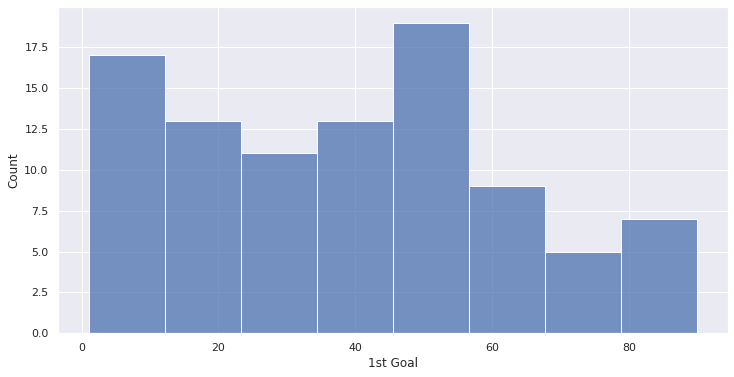

In [53]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.histplot(data=df['1st Goal'])

Заполним ее с применением различных стратегий

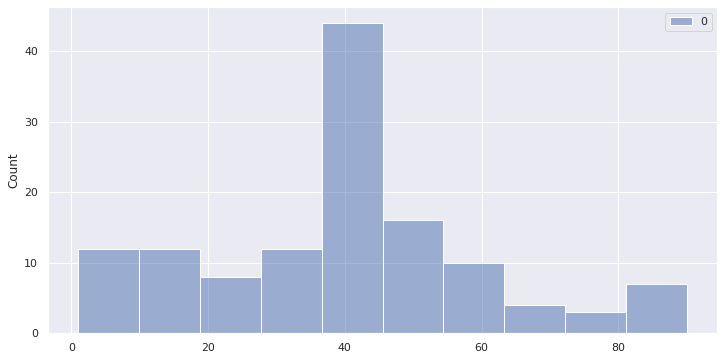

In [54]:
# Заполнение средним
mean_imp = SimpleImputer(strategy='mean')
tot_exp_mean = mean_imp.fit_transform(df[['1st Goal']])
sns.histplot(data=tot_exp_mean)

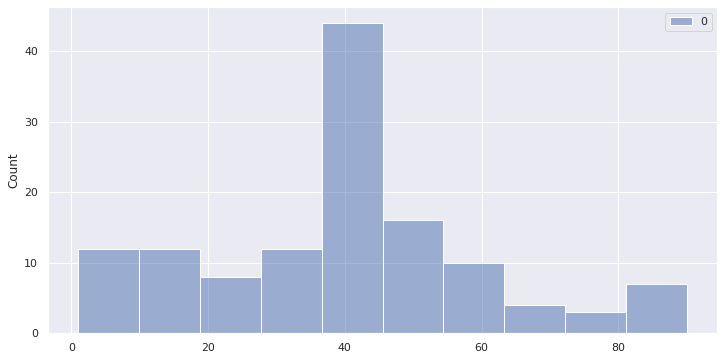

In [55]:
# Заполнение медианой
median_imp = SimpleImputer(strategy='median')
tot_exp_mean = median_imp.fit_transform(df[['1st Goal']])
sns.histplot(data=tot_exp_mean)

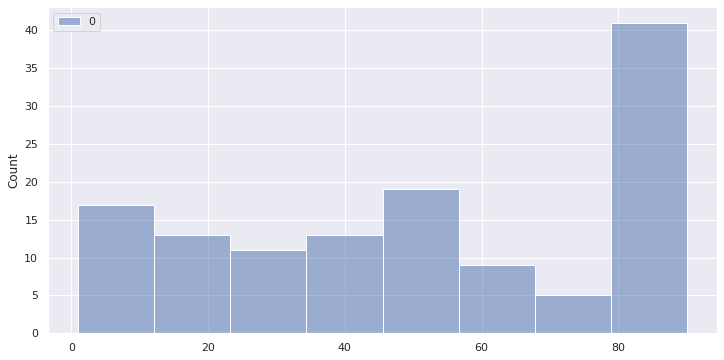

In [56]:
# Заполнение модой
most_freq_imp = SimpleImputer(strategy='most_frequent')
tot_exp_mean = most_freq_imp.fit_transform(df[['1st Goal']])
sns.histplot(data=tot_exp_mean)

В данном задании для обработки пропусков использован класс SimpleImputer. Он позволяет заполнить данные путем реализации разных стратегий, в данном случае: средним, медианой и модой. 

Для заполнения пропусков в категориальных признаках также используется класс SimpleImputer, только в этом случае он реализует стратегии most frequent (заполнение самым часто встречаемым значением) и constant (заполнение некторой константой).

Признаки с большим колличеством пропусков не подходят для дальнейшего построения моделей машинного обучения, такие как 1st Goal,	Own goals,	Own goal Time.
Все остальные признаки подходят для дальнейшей работы, так как в них нет пропусков.